# 应用举例：
## 例题：整数划分
### 问题描述
将正整数$n$表示成一系列正整数之和：$n=n_1+n_2+...+n_k$, 其中 $n_1{\geq}n_2{\geq}...{\geq}n_k{\geq}1$.正整数$n$的这种表示称为正整数$n$的划分

例如正整数6有如下11种划分
> 6:<br>
> 5+1 <br>
> 4+2__4+1+1<br>
> 3+3__3+2+1__3+1+1+1<br>
> 2+2+2__2+2+1+1__2+1+1+1<br>
> 1+1+1+1+1+1<br>

### 算法分析
在正整数$n$所有的划分中，将最大加数$N_1$不大于$m$划分的个数记作`divide(n,m)`，建立如下所示的递归关系式：

1. 当最大加数不大于1的时候，只有一种划分形式，也就是$1+1+1+1+\cdots$
   
2. 最大加数实际上不可能大于$n$，所以当$m>n$的时候，划分的个数也是1

3. 当$n=m$的时候，正整数的划分是由$N_1=m和N_1{\leq}n-1$的划分组成

4. 当$n>m>1$的时候，正整数的最大加数$N_1$不大于$m$的划分由$N_1=m$的划分和$N_1{\leq}m-1$的划分组成

In [14]:
# import functools
# @functools.lru_cache(maxsize=128,typed=False)
# 可使用缓存算法加速

def intDivide(n,m):
    if n==1 or m==1:
        return 1
    if n<m:
        return intDivide(n,n)
    if n==m:
        return intDivide(n,m-1)+1
    if n>m and m>1:
        return intDivide(n-m,m)+intDivide(n,m-1)
    return 0

if __name__=="__main__":
    print(intDivide(6,4))

9


## 例题：棋盘覆盖
### 问题描述
在一个$2^k{\times}2^k$个方格组成的棋盘上，有意个方格与其他方格不同，称为特殊方格，称这样的棋盘为特殊棋盘。<br>
要求对棋盘上除特殊方格外的所有部分用4种不同方向的 $L$ 形方块填满。

如图所示：

<img src="img/L形方块.drawio.svg" style="zoom:100%;">

### 算法分析
使用$n$表示棋盘的宽度，$n$必须满足$2^k$，如果$n=8$，特殊方格位于$(2,2)$位置

如图所示：


<img src="img/棋盘.drawio.svg" style="zoom:100%;">

我们使用分治法每次把整个棋盘分成4份，如果特殊方块在这个小棋盘中则继续分成4份，如果不在这个小棋盘中就把该小棋盘中靠近中央的那个方格位，表示$L$的$1/3$占据此处，每次递归都会遍历查询4个小棋盘，3个不含有特殊方格的棋盘置位的3个方格正好在大棋盘中央构成一个完整的$L$形方块，以此类推，找到全部覆盖方法

### 具体实现

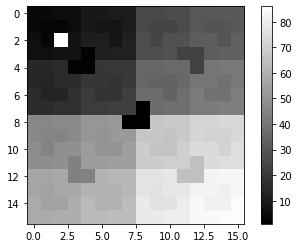

[[ 4  4  5  5  9  9 10 10 25 25 26 26 30 30 31 31]
 [ 4  3  3  5  9  8  8 10 25 24 24 26 30 29 29 31]
 [ 6  3 86  7 11 11  8 12 27 24 28 28 32 32 29 33]
 [ 6  6  7  7  2 11 12 12 27 27 28 23 23 32 33 33]
 [14 14 15  2  2 19 20 20 35 35 36 36 23 40 41 41]
 [14 13 15 15 19 19 18 20 35 34 34 36 40 40 39 41]
 [16 13 13 17 21 18 18 22 37 37 34 38 42 39 39 43]
 [16 16 17 17 21 21 22 22  1 37 38 38 42 42 43 43]
 [46 46 47 47 51 51 52  1  1 67 68 68 72 72 73 73]
 [46 45 45 47 51 50 52 52 67 67 66 68 72 71 71 73]
 [48 45 49 49 53 50 50 54 69 66 66 70 74 74 71 75]
 [48 48 49 44 53 53 54 54 69 69 70 70 65 74 75 75]
 [56 56 57 44 44 61 62 62 77 77 78 65 65 82 83 83]
 [56 55 57 57 61 61 60 62 77 76 78 78 82 82 81 83]
 [58 55 55 59 63 60 60 64 79 76 76 80 84 81 81 85]
 [58 58 59 59 63 63 64 64 79 79 80 80 84 84 85 85]]


In [22]:
import time

import numpy as np
import matplotlib.pyplot as plt


class Board:
    def __init__(self, size, x, y):
        '''
        初始化棋盘

        :param size: 棋盘边长
        :param x: 特殊点横坐标
        :param y: 特殊点纵坐标
        '''
        self.special_block = (x, y)
        self.board = np.zeros((size, size), dtype=int)
        self.board[x][y] = (size * size - 1) / 3 + 1
        self.t = 1
        self.size = size

    def visualize(self):
        '''
        可视化函数

        :return: None
        '''
        plt.imshow(self.board, cmap=plt.cm.gray)
        plt.colorbar()
        plt.show()

    def fill_block(self, x, y):
        '''
        填充点(x, y)
        :param x: x
        :param y: y
        :return: None
        '''

        if self.board[x][y] == 0:
            self.board[x][y] = self.t
        else:
            raise Exception

    def fill(self, s_x, s_y, size, c_x, c_y):
        '''
        递归函数填充棋盘或子棋盘（下文称区块)

        :param s_x: 区块左上角x
        :param s_y: 区块左上角y
        :param size: 区块边长
        :param c_x: 区块特殊点坐标x
        :param c_y: 区块特殊点坐标x
        :return: None
        '''
        if size == 1:
            return
        pos = (round((c_x - s_x + 1) / size), round((c_y - s_y + 1) / size))
        center = (round(s_x + size / 2 - 1), round(s_y + size / 2 - 1))
        ls = [(0, 0), (0, 1), (1, 0), (1, 1)]  # 代表四个子区块
        for i in ls:
            if i != pos:  # 如果不是原有特殊点所在区块，则构造特殊点并填充
                x = center[0] + i[0]
                y = center[1] + i[1]
                self.fill_block(x, y)
        self.t += 1  # 标记号加一，标记下一骨牌
        for i in ls:
            if i != pos:  # 如果不是原有特殊点所在区块
                # 所构造特殊点位置(x, y)
                x = center[0] + i[0]
                y = center[1] + i[1]
                x1 = s_x + i[0] * (size / 2)
                y1 = s_y + i[1] * (size / 2)
                self.fill(x1, y1, size / 2, x, y)
            else:  # 如果是原有特殊点所在区块
                x1 = s_x + i[0] * (size / 2)
                y1 = s_y + i[1] * (size / 2)
                self.fill(x1, y1, size / 2, c_x, c_y)

if __name__ == '__main__':
    k = eval(input("请输入正整数K(棋盘大小2^2k,2^2k):\n"))
    loc_x = eval(input("请输入特殊点横坐标:\n"))
    loc_y = eval(input("请输入特殊点纵坐标:\n"))
    size = 2 ** (2 * k)
    b = Board(size, loc_x, loc_y)
    b.fill(0, 0, size, loc_x, loc_y)
    b.visualize()
    print(b.board)